![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)

# Import Libraries
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/upload-icon.png?raw=true" width="100"/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set()
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics

style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# we are using excel file that's why I import openpyxl

!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 5.0 MB/s eta 0:00:0000:01


# Loading Dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/add-to-database.png?raw=true" width="100"/>

In [4]:
data = pd.read_excel('../input/tashkent-real-estate-2019/uybor.xlsx')

# EDA + FE: Exploratory Data Analysis and Feature Engineering
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/data%20analysis.png?raw=true" width="100"/>

In [5]:
data.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [6]:
data.shape

(7421, 9)

In [7]:
data.nunique()

address       1556
district        12
rooms            9
size           385
level           18
max_levels      22
price          695
lat            727
lng            693
dtype: int64

### We can see that this dataset doesn't have NaN values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [9]:
data.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


In [10]:
df=data.drop('address', axis=1, inplace=True)

### Price
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/price.png?raw=true" width="100"/>

#### Price-Column has got outliers

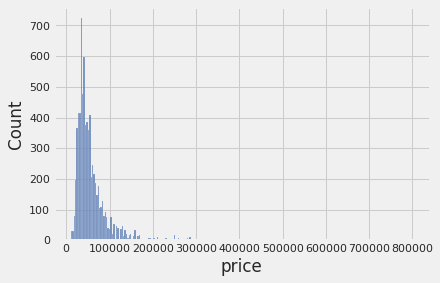

In [11]:
sns.histplot(data.price)
plt.show()

#### For a good result, i am looking a for normal distrubution, so trying to remove top 1% observations to reduce outliers after log transformation of price variable

In [12]:
data['price'] = np.log(data['price'])

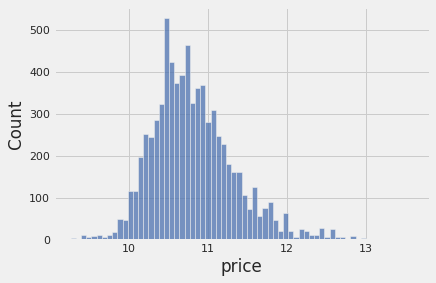

In [13]:
sns.histplot(data.price)
plt.show()

In [14]:
q = data['price'].quantile(0.99)
df = data[data['price']<q]
df.describe(include='all')

,district,rooms,size,level,max_levels,price,lat,lng
count,7345,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Chilonzor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.600000,71.699733,3.697890,6.014159,10.796618,41.303570,69.256409
std,NaN,1.051299,33.198019,2.238765,2.604267,0.502503,0.033890,0.059261
min,NaN,1.000000,14.000000,1.000000,1.000000,9.259131,41.186375,69.148915
25%,NaN,2.000000,50.000000,2.000000,4.000000,10.463103,41.281265,69.205802
50%,NaN,2.000000,65.000000,3.000000,5.000000,10.736397,41.296252,69.260121
75%,NaN,3.000000,84.000000,5.000000,9.000000,11.082143,41.325530,69.293713


In [15]:
df=data.copy()

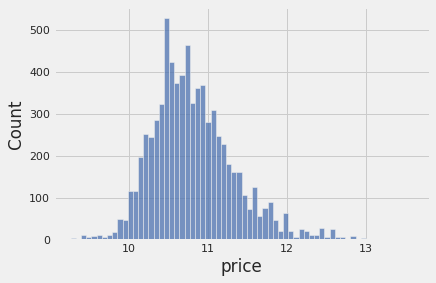

In [16]:
sns.histplot(df['price'])
plt.show()

((array([-3.73623215, -3.50686411, -3.38073859, ...,  3.38073859,
          3.50686411,  3.73623215]),
  array([ 9.25913054,  9.25913054,  9.25913054, ..., 13.37545401,
         13.59236701, 13.59236701])),
 (0.5270492384971507, 10.816395766532127, 0.9811286653309161))

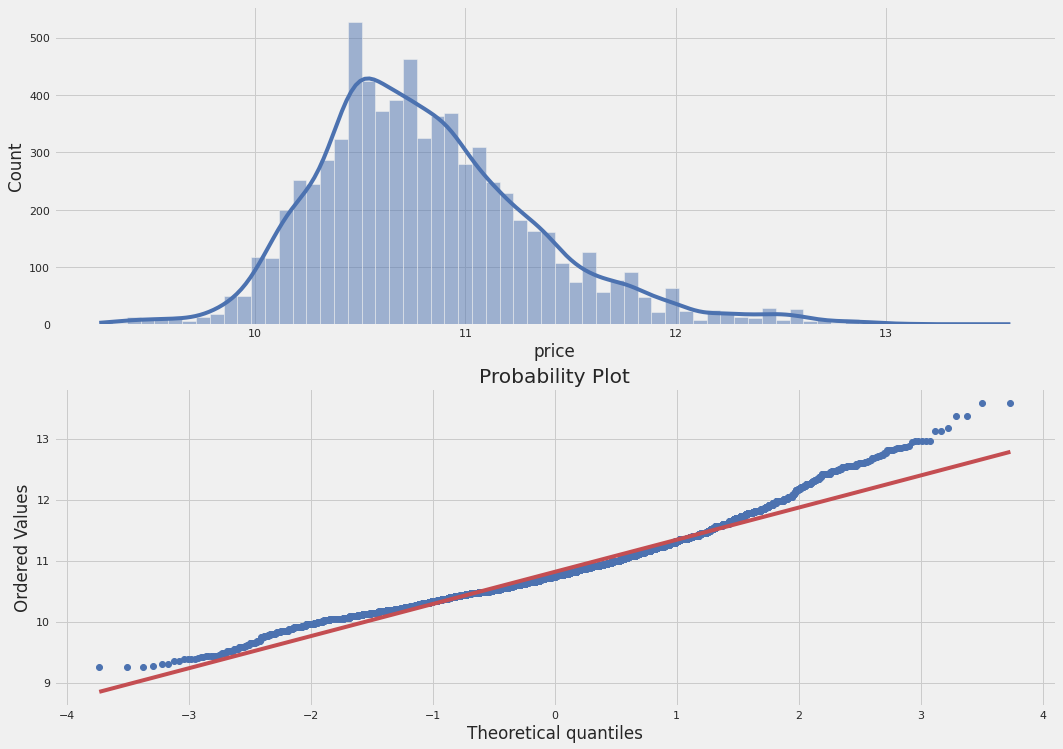

In [17]:
fig = plt.figure(figsize=(16, 12))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(df['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(df['price'], plot=ax2)

In [18]:
df.shape

(7421, 8)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

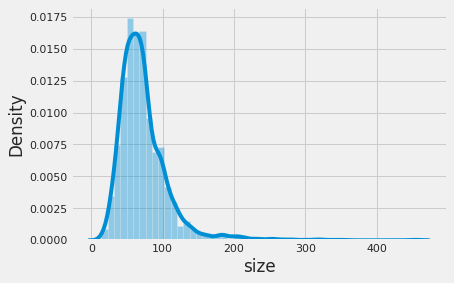

In [19]:
sns.distplot(df['size'])

In [20]:
q = df['size'].quantile(0.99)
df2 = df[df['size']<q]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

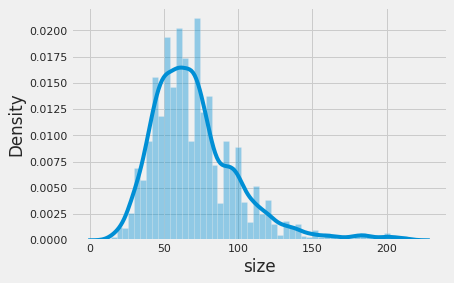

In [21]:
sns.distplot(df2["size"])

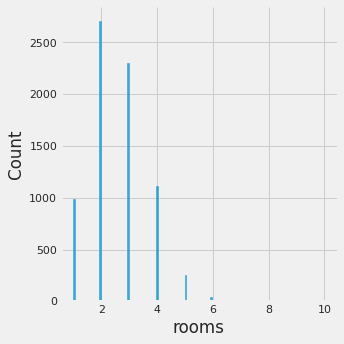

In [22]:
sns.displot(df['rooms'])

In [23]:
df3 = df[df.rooms < 7]

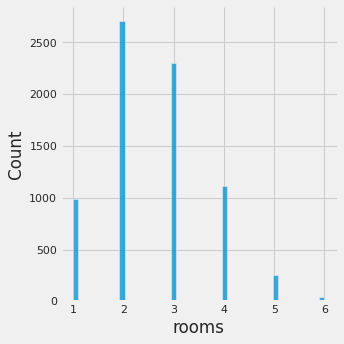

In [24]:
sns.displot(df3.rooms)

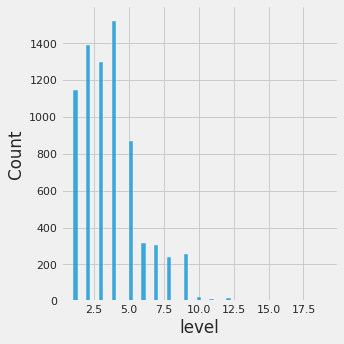

In [25]:
sns.displot(df['level'])

In [26]:
q=df3['level'].quantile(0.99)
df4=df3[df3['level']<q]

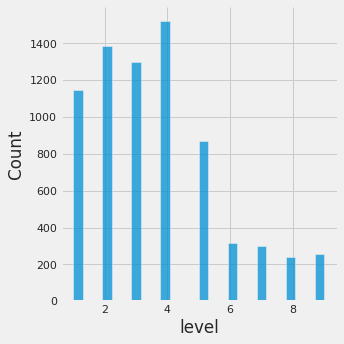

In [27]:
sns.displot(df4['level'])

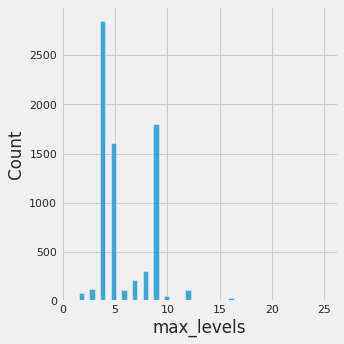

In [28]:
sns.displot(df4['max_levels'])

In [29]:
q=df4['level'].quantile(0.99)
df5=df4[df4['level']<q]

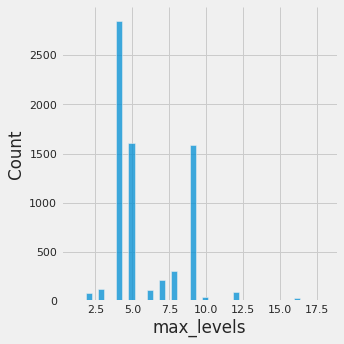

In [30]:
sns.displot(df5['max_levels'])

In [31]:
data_cleaned=df5.reset_index(drop=True)
data_cleaned.head()

,district,rooms,size,level,max_levels,price,lat,lng
0,Yunusobod,3,57.0,4,4,10.858999,41.371471,69.281049
1,Yakkasaroy,2,52.0,4,5,10.933107,41.291115,69.261104
2,Chilonzor,2,42.0,4,4,10.518673,41.280784,69.223683
3,Chilonzor,3,65.0,1,4,10.809728,41.290163,69.196862
4,Chilonzor,3,70.0,3,5,10.915088,41.300156,69.210831


In [32]:
data_cleaned.describe(include='all')

,district,rooms,size,level,max_levels,price,lat,lng
count,7070,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Chilonzor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.596605,72.074595,3.412306,5.805375,10.812108,41.303950,69.256726
std,NaN,1.039707,34.903855,1.817424,2.345410,0.534346,0.033622,0.059364
min,NaN,1.000000,14.000000,1.000000,1.000000,9.259131,41.186375,69.148915
25%,NaN,2.000000,50.000000,2.000000,4.000000,10.463103,41.281265,69.205802
50%,NaN,2.000000,65.000000,3.000000,5.000000,10.736397,41.296388,69.260189
75%,NaN,3.000000,84.000000,4.000000,8.000000,11.103206,41.326712,69.293713


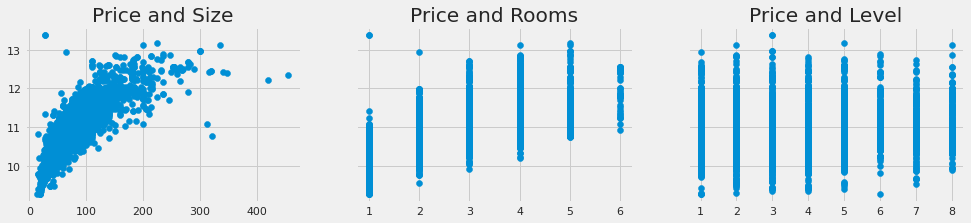

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['size'],data_cleaned['price'])
ax1.set_title('Price and Size')
ax2.scatter(data_cleaned['rooms'],data_cleaned['price'])
ax2.set_title('Price and Rooms')
ax3.scatter(data_cleaned['level'], data_cleaned['price'])
ax3.set_title('Price and Level')

plt.show()

In [34]:
print("Below the most important features relative to Price-target")
corr = data_cleaned.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Below the most important features relative to Price-target
price         1.000000
size          0.813099
rooms         0.692393
max_levels    0.297778
level         0.105155
lng           0.062567
lat           0.024733
Name: price, dtype: float64


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables=data_cleaned[['size', 'rooms','level','max_levels']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif['features']=variables.columns

In [48]:
vif

,VIF,features
0,13.894738,size
1,14.912936,rooms
2,5.645274,level
3,7.964936,max_levels


In [37]:
data_no_multicollinearity=data_cleaned.drop(['rooms'],axis=1)

In [43]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [44]:
data_with_dummies.head()

,size,level,max_levels,price,lat,lng,district_Chilonzor,district_Mirobod,district_Mirzo Ulugbek,district_Olmzor,district_Sergeli,district_Shayhontohur,district_Uchtepa,district_Yakkasaroy,district_Yangihayot,district_Yashnobod,district_Yunusobod
0,57.0,4,4,10.858999,41.371471,69.281049,0,0,0,0,0,0,0,0,0,0,1
1,52.0,4,5,10.933107,41.291115,69.261104,0,0,0,0,0,0,0,1,0,0,0
2,42.0,4,4,10.518673,41.280784,69.223683,1,0,0,0,0,0,0,0,0,0,0
3,65.0,1,4,10.809728,41.290163,69.196862,1,0,0,0,0,0,0,0,0,0,0
4,70.0,3,5,10.915088,41.300156,69.210831,1,0,0,0,0,0,0,0,0,0,0


In [45]:
data_with_dummies.shape

(7070, 17)

In [ ]:
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

Cross-validation score: 0.7035234203859492
MSE: 0.07474327282000082
RMSE: 0.2733921593974502
MAE: 0.20674455432353114
Score (train): 0.7055110899272559
Score (test): 0.7273394584860612
Real Value: 11.695247021764184$, Predicted Value: 11$
Real Value: 10.645424897265505$, Predicted Value: 10$
Real Value: 10.146433731146518$, Predicted Value: 10$
Real Value: 10.404262840448617$, Predicted Value: 10$
Real Value: 10.680516217076775$, Predicted Value: 10$


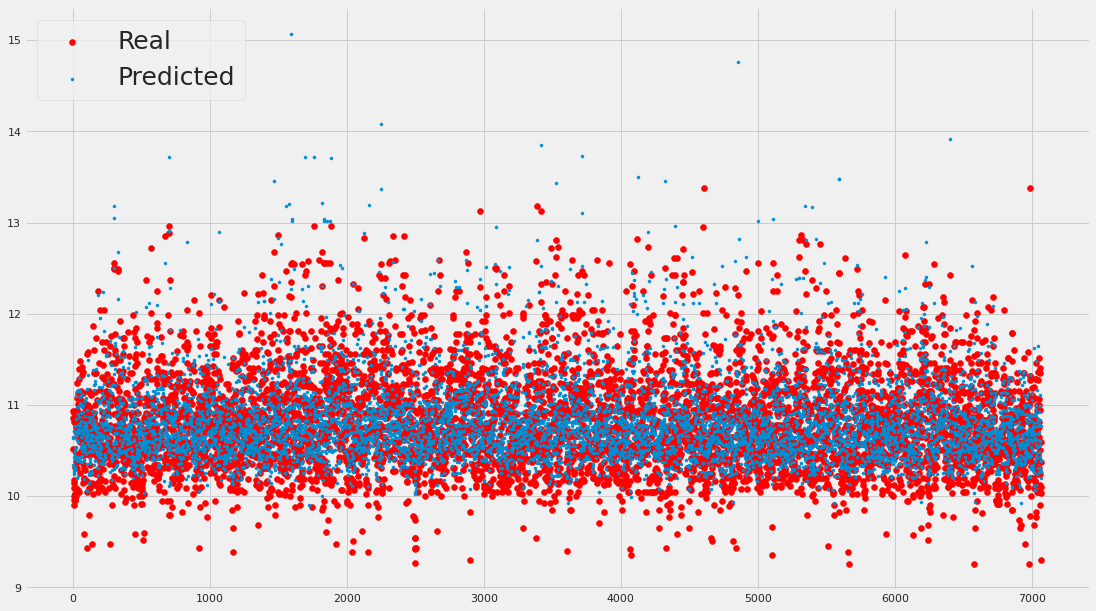

In [46]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# define features and target
X = data_with_dummies.drop(['price'], axis=1)
y = data_with_dummies['price']

# define pipeline with preprocessor, Ridge regression, and StandardScaler
pipe = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# cross-validation score
print('Cross-validation score:', cross_val_score(pipe, X, y).mean())

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# fit pipeline on training data
pipe.fit(X_train, y_train)

# evaluate model on test data
print('MSE:', metrics.mean_squared_error(y_test, pipe.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pipe.predict(X_test))))
print('MAE:', metrics.mean_absolute_error(y_test, pipe.predict(X_test)))
print('Score (train):', pipe.score(X_train, y_train))
print('Score (test):', pipe.score(X_test, y_test))

# randomly select 5 test instances to compare real vs predicted values
for i in range(5):
    rnd = np.random.randint(0, y_test.shape[0] - 1)
    real = y_test.iloc[rnd]
    pred = int(pipe.predict(X_test.iloc[rnd].to_frame().T)[0])
    print(f'Real Value: {real}$, Predicted Value: {pred}$')

# visualize model results
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(range(X.shape[0]), y, color='red', label='Real')
ax.scatter(range(X.shape[0]), pipe.predict(X), marker='.', label='Predicted')
ax.legend(loc=2, prop={'size': 25})
plt.show()


In [ ]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=df.rooms, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x='size', y='price', data=df, ax=ax2)


#### Date-column have to be deleted

#### Checking:

In [ ]:
df.head(3)

### Bedrooms
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/bedroom.png?raw=true" width="100"/>

In [ ]:
sns.catplot(x='rooms', y='price', data=df, height=5, aspect=2)

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df.rooms)

#### We can see outliers, when the value >= 7. Let's delete this one

In [ ]:
df_no_out = df[df.rooms < 7]

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(x=df_no_out.rooms)
plt.ylabel('Amount')

In [ ]:
df_no_out.shape

### Square footage
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/floor-plan.png?raw=true" width="100"/>

In [ ]:
sqft_cols = df_no_out.columns[df_no_out.columns.str.contains('sqft')]
sqft_cols

In [ ]:
def show_count_plots(df_no_out, cols):
    fig = plt.figure(figsize=(10, 10))
    grid = GridSpec(ncols=2,
                    nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(df_no_out[name], kde=True, ax=ax)

In [ ]:
show_count_plots(df_no_out, sqft_cols)

### Level
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/floors.png?raw=true" width="100"/>

In [ ]:
sns.catplot(x='level', y='price', data=df_no_out, height=5, aspect=2)

In [ ]:
mask_level = {1: 1, 1.5:1, 2:2, 2.5:3, 3:3, 3.5:3}
df_no_out.level = df_no_out.level.map(mask_level)

In [ ]:
# Excellent !
sns.catplot(x='level', y='price', data=df_no_out, height=5, aspect=2)

#### Let's check the attributes again

In [ ]:
df_no_out.head(3)

### Maximum levels
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/condition.png?raw=true" width="100"/>

In [ ]:
print(df_no_out.max_levels.value_counts())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
sns.boxplot(x='max_levels', y='price', data=df_no_out, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='max_levels', y='price', data=df_no_out, ax=ax2)

#### Delete column with value = 1

In [ ]:
mask_level = df_no_out.max_levels > 1
df_no_out = df_no_out[mask_level]

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='max_levels', y='price', data=df_no_out)

In [ ]:
sns.histplot(df_no_out['max_levels'])

#### Checking the data

In [ ]:
df_no_out.head(3)

### Location information
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/location.png?raw=true" width="100"/>

#### Street

In [ ]:
df_no_out.address.value_counts()

In [ ]:
data=df_no_out.copy()

#### This will prevent finding the common pattern

In [ ]:
data.drop('address', axis=1, inplace=True)

### Checking the dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/checking.png?raw=true" width="100"/>

In [ ]:
print(data.shape)
data.head(3)

# Prepare data for training
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/prepare.png?raw=true" width="100"/>

In [ ]:
X = data.drop('price', axis=1)
y = data.price.astype(int)

### Scaler

In [ ]:
# set up preprocessing numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [ ]:
# set up preprocessing categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# select columns by datatype
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [ ]:
# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

# Model training and visualising
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/external-training-lineal-.png?raw=true" width="100"/>

In [ ]:
from sklearn.linear_model import Ridge

# define pipeline with preprocessor and Ridge regression
pipe = make_pipeline(preprocessor, Ridge(alpha=0.1))

# cross-validation score
print('Cross-validation score:', cross_val_score(pipe, X, y).mean())

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# fit pipeline on training data
pipe.fit(X_train, y_train)

# evaluate model on test data
print('MSE:', metrics.mean_squared_error(y_test, pipe.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pipe.predict(X_test))))
print('MAE:', metrics.mean_absolute_error(y_test, pipe.predict(X_test)))
print('Score (train):', pipe.score(X_train, y_train))
print('Score (test):', pipe.score(X_test, y_test))

# randomly select 5 test instances to compare real vs predicted values
for i in range(5):
    rnd = np.random.randint(0, y_test.shape[0] - 1)
    real = y_test.iloc[rnd]
    pred = int(pipe.predict(X_test.iloc[rnd].to_frame().T)[0])
    print(f'Real Value: {real}$, Predicted Value: {pred}$')
    
# visualize model results
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(range(X.shape[0]), y, color='red', label='Real')
ax.scatter(range(X.shape[0]), pipe.predict(X), marker='.', label='Predicted')
ax.legend(loc=2, prop={'size': 25})
plt.show()


def pipeline_model(X, y, data):
    # define pipeline with preprocessor and Linear Regression
    pipe = make_pipeline(preprocessor, LinearRegression())

    # cross-validation score
    print('Cross-validation score:', cross_val_score(pipe, X, y).mean())

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

    # fit pipeline on training data
    pipe.fit(X_train, y_train)

    # evaluate model on test data
    print('MSE:', metrics.mean_squared_error(y_test, pipe.predict(X_test)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pipe.predict(X_test))))
    print('MAE:', metrics.mean_absolute_error(y_test, pipe.predict(X_test)))
    print('Score (train):', pipe.score(X_train, y_train))
    print('Score (test):', pipe.score(X_test, y_test))

    # randomly select 5 test instances to compare real vs predicted values
    for i in range(5):
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        real = y_test.iloc[rnd]
        pred = int(pipe.predict(X_test.iloc[rnd].to_frame().T)[0])
        print(f'Real Value: {real}$, Predicted Value: {pred}$')

    # visualize model results
    fig, ax = plt.subplots(figsize=(17, 10))
    ax.scatter(range(X.shape[0]), y, color='red', label='Real')
    ax.scatter(range(X.shape[0]), pipe.predict(X), marker='.', label='Predicted')
    ax.legend(loc=2, prop={'size': 25})
    plt.show()


In [ ]:
pipeline_model(X, y, data)

Based solely on the metrics provided, it is difficult to make a definitive judgment about whether the model is "bad" or not. The model's performance would depend on the specific context and requirements of the problem being solved.

However, there are some indications from the provided metrics that suggest the model may not be performing very well.